<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2020_2021/blob/main/DiskActuator/DiskActuator_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as mpl
%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (14, 3.5)

<img src="https://raw.githubusercontent.com/joaochenriques/MCTE_2020_2021/main/DiskActuator/figs/domain_V2.svg" width="500px" style="display:inline">

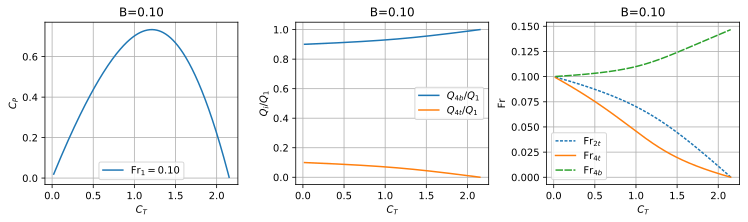

In [51]:
fig, (ax1, ax2, ax3) = mpl.subplots(1,3, figsize=(12.5,3) )
fig.subplots_adjust( wspace = .3 )

C_T_lst = []
C_P_lst = []
Fr2t_lst = []
Fr4b_lst = []
Fr4t_lst = []

Fr4b_zeta4b_lst = []
Fr4t_zeta4t_lst = []

B = 0.1
Fr1 = 0.1

for Fr4b in np.linspace( Fr1*1.001, Fr1*2.6, 1000 ):

  ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1
  
  Fr4t = (Fr1 - Fr4b*ζ4 + np.sqrt(B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b \
          + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2))/B
  ζ4b = (Fr1 - Fr4t*ζ4)/(Fr4b - Fr4t)
  ζ4t = (-Fr1 + Fr4b*ζ4)/(Fr4b - Fr4t)
  
  Fr2t = Fr4t*ζ4t/B
  C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
  C_P = C_T*Fr2t/Fr1

  if C_P <= 0.0: break

  C_P_lst.append( C_P )
  C_T_lst.append( C_T )

  Fr2t_lst.append( Fr2t )
  Fr4t_lst.append( Fr4t )
  Fr4b_lst.append( Fr4b )

  Fr4b_zeta4b_lst.append( Fr4b*ζ4b / Fr1 )
  Fr4t_zeta4t_lst.append( Fr4t*ζ4t / Fr1 )

ax1.set_title( "B=%.2f" % B )
ax1.plot( C_T_lst, C_P_lst, label="$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax1.set_ylabel( "$C_P$" )
ax1.grid()
ax1.legend();
#ax1.set_xticklabels( [] )
ax1.set_xlabel( "$C_T$" )

ax2.set_title( "B=%.2f" % B )
ax2.plot( C_T_lst, Fr4b_zeta4b_lst, label="$Q_{4b}/Q_1$" )
ax2.plot( C_T_lst, Fr4t_zeta4t_lst, label="$Q_{4t}/Q_1$" )
ax2.set_xlabel( "$C_T$" )
ax2.set_ylabel( "$Q_i/Q_1$" )
ax2.grid()
ax2.legend()

ax3.set_title( "B=%.2f" % B )
ax3.plot( C_T_lst, Fr2t_lst, dashes=(2,1), label="$\mathrm{Fr}_{2t}$" )
ax3.plot( C_T_lst, Fr4t_lst, label="$\mathrm{Fr}_{4t}$" )
ax3.plot( C_T_lst, Fr4b_lst, dashes=(5,1), label="$\mathrm{Fr}_{4b}$" )
ax3.set_xlabel( "$C_T$" )
ax3.set_ylabel( "$\mathrm{Fr}$" )
ax3.grid()
ax3.legend();

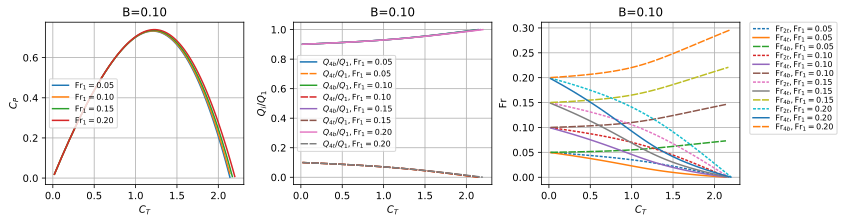

In [52]:
fig, (ax1, ax2, ax3) = mpl.subplots(1,3, figsize=(12.5,3) )
fig.subplots_adjust( wspace = 0.25 )

B = 0.10

for Fr1 in ( 0.05, 0.10, 0.15, 0.20 ):

  C_T_lst = []
  C_P_lst = []
  Fr2t_lst = []
  Fr4b_lst = []
  Fr4t_lst = []

  Fr4b_zeta4b_lst = []
  Fr4t_zeta4t_lst = []
  
  for Fr4b in np.linspace( Fr1*1.001, Fr1*2, 200 ):

    ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1

    Fr4t = (Fr1 - Fr4b*ζ4 + np.sqrt(B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b\
            + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2))/B
    ζ4b = (Fr1 - Fr4t*ζ4)/(Fr4b - Fr4t)
    ζ4t = (-Fr1 + Fr4b*ζ4)/(Fr4b - Fr4t)
    
    Fr2t = Fr4t*ζ4t/B
    C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
    C_P = C_T*Fr2t/Fr1

    if C_P <= 0.0: break

    C_P_lst.append( C_P )
    C_T_lst.append( C_T )

    Fr2t_lst.append( Fr2t )
    Fr4t_lst.append( Fr4t )
    Fr4b_lst.append( Fr4b )

    Fr4b_zeta4b_lst.append( Fr4b*ζ4b / Fr1 )
    Fr4t_zeta4t_lst.append( Fr4t*ζ4t / Fr1 )

  ax1.plot( C_T_lst, C_P_lst, label="$\mathrm{Fr}_1=%.2f$" % Fr1 )

  ax2.plot( C_T_lst, Fr4b_zeta4b_lst, label="$Q_{4b}/Q_1, \mathrm{Fr}_1=%.2f$" % Fr1 )
  ax2.plot( C_T_lst, Fr4t_zeta4t_lst, dashes=(5,1), label="$Q_{4t}/Q_1, \mathrm{Fr}_1=%.2f$" % Fr1 )  

  ax3.plot( C_T_lst, Fr2t_lst, dashes=(2,1), label="$\mathrm{Fr}_{2t}, \mathrm{Fr}_1=%.2f$" % Fr1 )
  ax3.plot( C_T_lst, Fr4t_lst, label="$\mathrm{Fr}_{4t}, \mathrm{Fr}_1=%.2f$" % Fr1 )
  ax3.plot( C_T_lst, Fr4b_lst, dashes=(5,1), label="$\mathrm{Fr}_{4b}, \mathrm{Fr}_1=%.2f$" % Fr1 )

ax1.set_ylabel( "$C_P$" )
ax1.grid()
ax1.set_title( "B=%.2f" % B );
ax1.set_xlabel( "$C_T$" )
ax1.legend(loc="center left",fontsize=8 )

ax2.set_title( "B=%.2f" % B );
ax2.set_xlabel( "$C_T$" )
ax2.set_ylabel( "$Q_i/Q_1$" )
ax2.grid()
ax2.legend(loc="center left",fontsize=8 )

ax3.set_title( "B=%.2f" % B )
ax3.set_xlabel( "$C_T$" )
ax3.set_ylabel( "$\mathrm{Fr}$" )
ax3.grid()
ax3.legend( bbox_to_anchor=(1.05, 1), loc=2,fontsize=8, borderaxespad=0.0,handlelength=2,numpoints=1,labelspacing=0.15 );

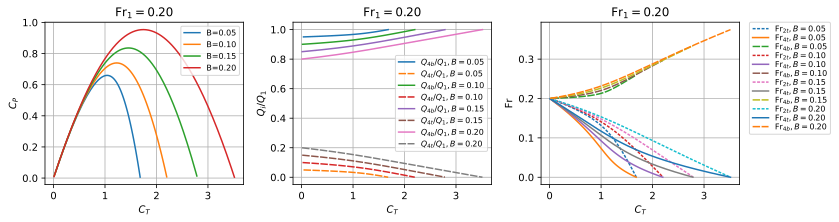

In [53]:

fig, (ax1, ax2, ax3) = mpl.subplots(1,3, figsize=(12.5,3))
fig.subplots_adjust( wspace = 0.25 )

Fr1 = 0.2

for B in ( 0.05, 0.10, 0.15, 0.20 ):

  C_T_lst = []
  C_P_lst = []
  Fr2t_lst = []
  Fr4b_lst = []
  Fr4t_lst = []

  Fr4b_zeta4b_lst = []
  Fr4t_zeta4t_lst = []

  for Fr4b in np.linspace( Fr1*1.001, Fr1*2, 200 ):

    ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1

    Fr4t = (Fr1 - Fr4b*ζ4 + np.sqrt(B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b\
            + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2))/B
    ζ4b = (Fr1 - Fr4t*ζ4)/(Fr4b - Fr4t)
    ζ4t = (-Fr1 + Fr4b*ζ4)/(Fr4b - Fr4t)
    
    Fr2t = Fr4t*ζ4t/B
    C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
    C_P = C_T*Fr2t/Fr1

    if C_P <= 0.0: 
      break

    C_P_lst.append( C_P )
    C_T_lst.append( C_T )

    Fr2t_lst.append( Fr2t )
    Fr4t_lst.append( Fr4t )
    Fr4b_lst.append( Fr4b )

    Fr4b_zeta4b_lst.append( Fr4b*ζ4b / Fr1 )
    Fr4t_zeta4t_lst.append( Fr4t*ζ4t / Fr1 )

  ax1.plot( C_T_lst, C_P_lst, label="B=%.2f" % B )

  ax2.plot( C_T_lst, Fr4b_zeta4b_lst, label="$Q_{4b}/Q_1, B=%.2f$" % B )
  ax2.plot( C_T_lst, Fr4t_zeta4t_lst, dashes=(5,1), label="$Q_{4t}/Q_1, B=%.2f$" % B )   

  ax3.plot( C_T_lst, Fr2t_lst, dashes=(2,1), label="$\mathrm{Fr}_{2t}, B=%.2f$" % B )
  ax3.plot( C_T_lst, Fr4t_lst, label="$\mathrm{Fr}_{4t}, B=%.2f$" % B )
  ax3.plot( C_T_lst, Fr4b_lst, dashes=(5,1), label="$\mathrm{Fr}_{4b}, B=%.2f$" % B )

ax1.set_title( r"$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax1.set_ylabel( "$C_P$" )
ax1.set_xlabel( "$C_T$" )
ax1.grid()
ax1.legend(loc="upper right",fontsize=8 )

ax2.set_title( r"$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax2.set_xlabel( "$C_T$" )
ax2.set_ylabel( "$Q_i/Q_1$" )
ax2.grid()
ax2.legend(loc="center right",fontsize=8 )

ax3.set_title( r"$\mathrm{Fr}_1=%.2f$" % Fr1 )
ax3.set_xlabel( "$C_T$" )
ax3.set_ylabel( "$\mathrm{Fr}$" )
ax3.grid()
ax3.legend( bbox_to_anchor=(1.05, 1), loc=2,fontsize=8, borderaxespad=0.0,handlelength=2,numpoints=1,labelspacing=0.15 );